In [1]:
%conda install matplotlib -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.10.0



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Normality test using Python

### Generating example data

In [3]:
from scipy import stats

x1 = np.linspace(-5, 5, 1000)
x2 = np.linspace(-10, 10, 5000)
norm1 = stats.norm(0, 2)
norm2 = stats.norm(0, 5)

non_norm1 = stats.expon()
non_norm2 = stats.t(5)

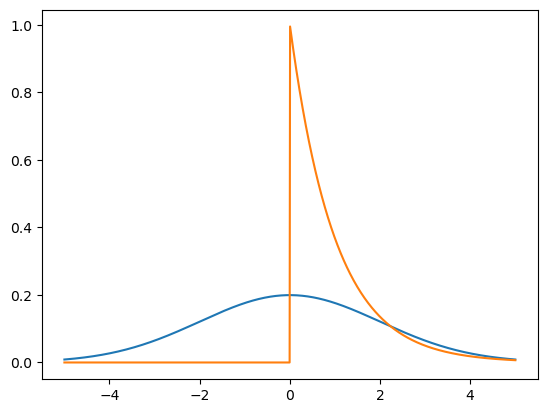

In [4]:
plt.plot(x1, norm1.pdf(x1))
plt.plot(x1, non_norm1.pdf(x1))

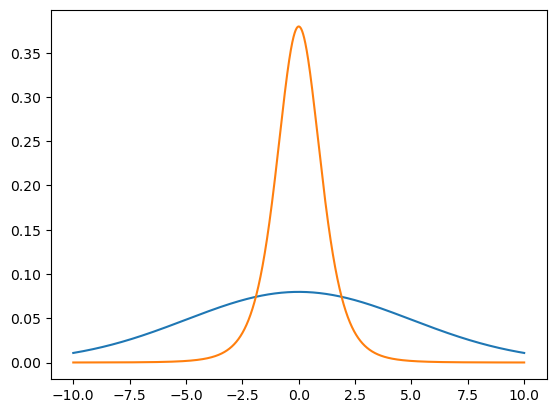

In [5]:
plt.plot(x2, norm2.pdf(x2))
plt.plot(x2, non_norm2.pdf(x2))

### Shapiro-Wilks Test

The null hypothesis (H0): the data follow a normal distribution.  
Alternative Hypothesis (H1): The data do not follow a normal distribution.

In [6]:
test_stat, pv = stats.shapiro(norm1.rvs(1000))
print(f"test statistics: {test_stat}, p-value: {pv}")

test statistics: 0.9979699850082397, p-value: 0.2702866494655609


In [7]:
test_stat, pv = stats.shapiro(non_norm1.rvs(1000))
print(f"test statistics: {test_stat}, p-value: {pv}")

test statistics: 0.809908926486969, p-value: 1.0315895242422569e-32


### One-Sample Kolmogorov-Smirnov Test

The null hypothesis (H0): Same as above.  
Alternative Hypothesis (H1): Same as above.

In [8]:
test_stat, pv = stats.kstest(norm2.rvs(5000), 'norm', args=(norm2.mean(), norm2.var() ** 0.5))
print(f"test statistics: {test_stat}, p-value: {pv}")

test statistics: 0.018572594223989936, p-value: 0.06273786740041598


In [9]:
test_stat, pv = stats.kstest(non_norm2.rvs(5000), 'norm', args=(non_norm2.mean(), non_norm2.var() ** 0.5))
print(f"test statistics: {test_stat}, p-value: {pv}")

test statistics: 0.0459646984744049, p-value: 1.2830297893987954e-09


### Q-Q Plot

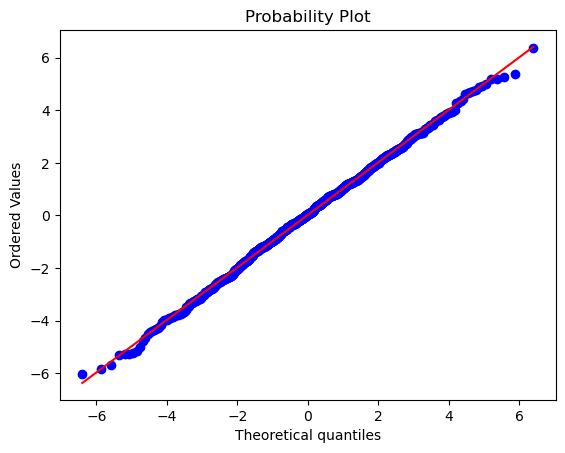

In [10]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
res = stats.probplot(norm1.rvs(1000), dist=stats.norm(0, 2), plot=ax1)

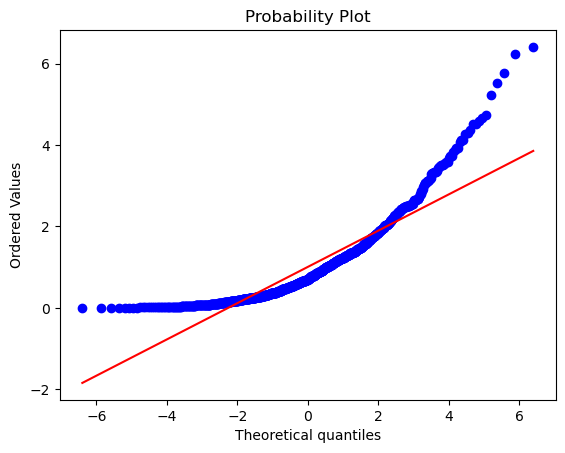

In [11]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
res = stats.probplot(non_norm1.rvs(1000), dist=stats.norm(0, 2), plot=ax1)

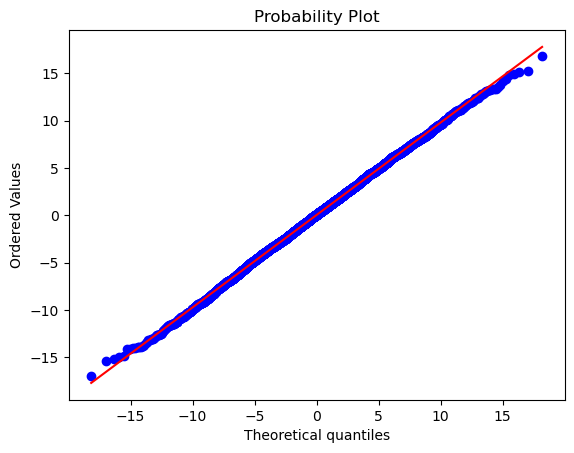

In [12]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
res = stats.probplot(norm2.rvs(5000), dist=stats.norm(0, 5), plot=ax1)

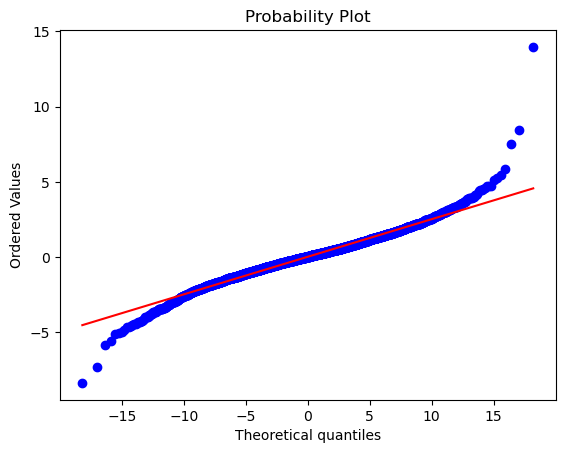

In [13]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
res = stats.probplot(non_norm2.rvs(5000), dist=stats.norm(0, 5), plot=ax1)

## T-test

### One Sample T-Test

The null hypothesis (H0): the mean of the population is equal to the suggested mean.  
Alternative Hypothesis (H1): The mean of the population differs from the proposed mean.

Sample mean: 0.4199590958579377


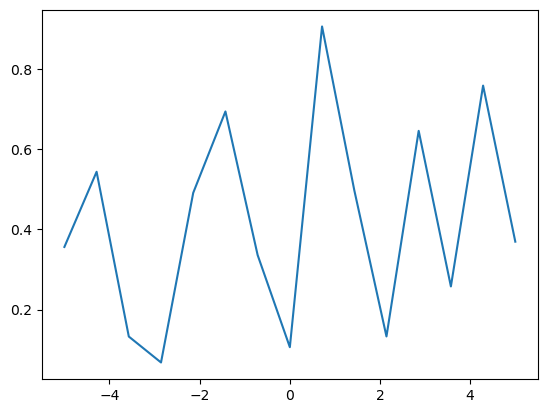

In [32]:
# 15 Samples from a population with a mean of 0.5

x1 = np.linspace(-5, 5, 15)
rand = stats.uniform().rvs(size=15)
plt.plot(x1, rand)
print(f"Sample mean: {rand.mean()}")

Actual average of population: 0.5011511700021423


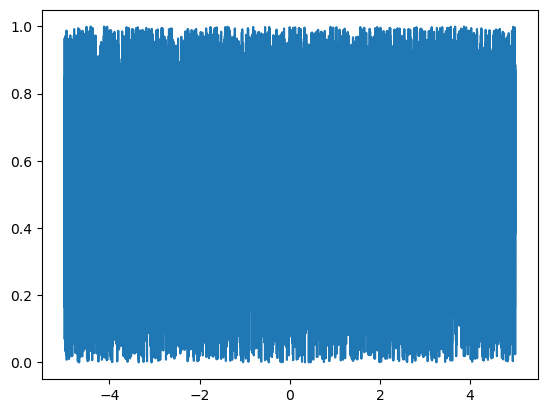

In [31]:
x2 = np.linspace(-5, 5, 10000)
pop = stats.uniform().rvs(size=10000)
plt.plot(x2, pop)

print(f"Actual average of population: {pop.mean()}")

In [16]:
# Perform the correct t test (expected mean = 0.5)
test_stat, pv = stats.ttest_1samp(rand, popmean=0.5)
print(f"test statistics: {test_stat}, p-value: {pv}")

test statistics: -0.044907768532786704, p-value: 0.9648150886117143


In [17]:
# Perform an invalid t test (expected mean = 10)
test_stat, pv = stats.ttest_1samp(rand, popmean=10)
print(f"test statistics: {test_stat}, p-value: {pv}")

test statistics: -183.7034141292575, p-value: 4.417741414268013e-25


### Paired Samples T-Test

The null hypothesis (H0): the means of the two paired populations are equal.  
Alternative Hypothesis (H1): The means of the two paired populations are not equal to each other.

Before special lecture: 78.37072735885499
After special lecture: 82.53784844982007


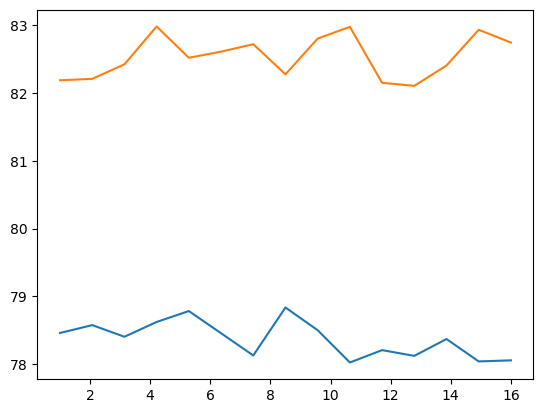

In [28]:
# When 100 students were asked to take an English test and 15 students were selected to measure the average, the score was 78.
# When the average of the group was measured again after a month of special lecture, it reached 82 points.

x = np.linspace(1, 16, 15)
before = stats.uniform(78).rvs(size=15)
after = stats.uniform(82).rvs(size=15)

plt.plot(x, before)
plt.plot(x, after)
print(f"Before special lecture: {before.mean()}")
print(f"After special lecture: {after.mean()}")

In [19]:
# T-test
test_stat, pv = stats.ttest_rel(before, after)
print(f"test statistics: {test_stat}, p-value: {pv}")

test statistics: -33.05974226400104, p-value: 1.0903195085607762e-14


### Independent Samples T-Test

The null hypothesis (H0): means of two independent populations are equal.  
Alternative Hypothesis (H1): The means of the two independent populations are not equal to each other.

A 회사 표본 평균: 305.6773054937167
B 회사 표본 평균: 316.455997993999


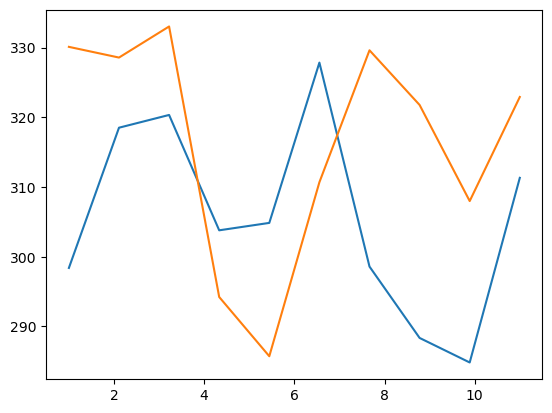

In [20]:
# When 10 employees of Company A were selected and the average was measured
# It was found to be 2.8 million won
# When 10 employees were selected from Company B and the average was measured, it was found to be 2.85 million won.
x = np.linspace(1, 11, 10)
a = stats.uniform(280, 50).rvs(size=10)
b = stats.uniform(285, 50).rvs(size=10)

plt.plot(x, a)
plt.plot(x, b)
print(f"A 회사 표본 평균: {a.mean()}")
print(f"B 회사 표본 평균: {b.mean()}")

In [21]:
# T-test
test_stat, pv = stats.ttest_ind(a, b)
print(f"test statistics: {test_stat}, p-value: {pv}")

test statistics: -1.5897567436027822, p-value: 0.12929936857444785


## Practice

### Practice the normality test
Test whether the given distribution is extracted from a population that follows a normal distribution using the correct analysis.

In [22]:
from scipy import stats
data = stats.f(10, 20).rvs(200)

First, Q-Q analysis is performed to analyze the data.

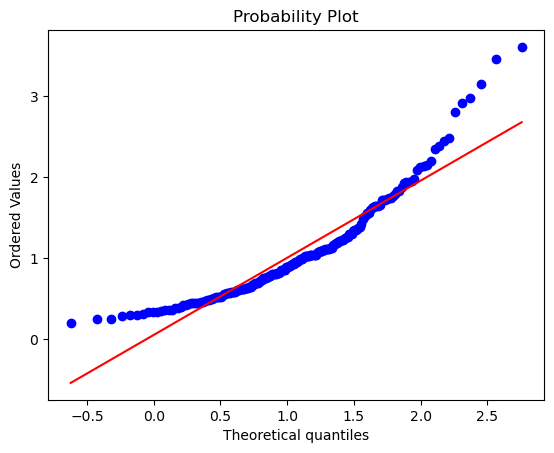

In [23]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
res = stats.probplot(data, dist=stats.norm(data.mean(), (data.var() ** 0.5)), plot=ax1)

Although it appears to be far off, the Shapiro-Wilks test is performed for more convincing results. (Since the number of samples is 200)

The null hypothesis (H0): the data follow a normal distribution.  
Alternative Hypothesis (H1): The data do not follow a normal distribution.

In [24]:
test_stat, pv = stats.kstest(data, 'norm', args=(data.mean(), data.var() ** 0.5))
print(f"test statistics: {test_stat}, p-value: {pv}")

test statistics: 0.1307638203185194, p-value: 0.0019252962012848815


Since the p-value is 0.066, the null hypothesis can be rejected at a level of approximately 93% confidence. Thus, there is good reason to say that **this data does not follow a normal distribution**.

### T-test practice

In order to obtain the average height of adults in a city with a population of 230,000, 2,000 citizens were sampled and the average was measured.  
If the average height of this sample is 168.5 cm, test the average height of adults across the city by statistical means.

Sample mean: 168.508576841318


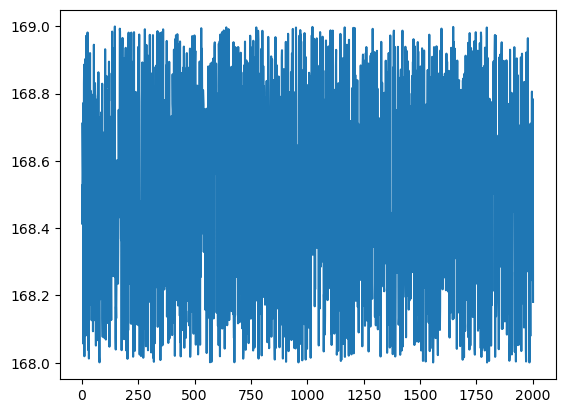

In [29]:
x = np.linspace(1, 2001, 2000)
sample = stats.uniform(168).rvs(size=2000)
plt.plot(x, sample)
print(f"Sample mean: {sample.mean()}")

The null hypothesis (H0): the city's overall adult average height is 168.5 cm.  
Alternative Hypothesis (H1): The city's overall adult average height is not 168.5 cm.

In [26]:
# Perform the T test (expected mean = 168.5)
test_stat, pv = stats.ttest_1samp(sample, popmean=168.5)
print(f"test statistics: {test_stat}, p-value: {pv}")

test statistics: 0.7477942360395818, p-value: 0.4546722380598681


The null hypothesis could not be rejected because the p-value was 0.64. Thus, there is sufficient evidence to suggest that the city's overall adult average height is 168.5 cm.
